# Парная линейная регрессия

## Задания для выполнения
1) Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысла).

2) Можно взять не очень актуальные, но готовые данные в приложении (папка data).

3) Построить модель парной линейной регрессии с использованием метода градиентного спуска.

4) Оценить на графике качество построенной модели.

5) Построить кривые обучения.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
mvid = pd.read_csv('MVID_101001_171001.txt')
sber = pd.read_csv('SBER_101001_171001.txt')

In [ ]:
mvid.shape

(1758, 6)

In [ ]:
sber.shape

(1758, 6)

In [ ]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [ ]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [ ]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

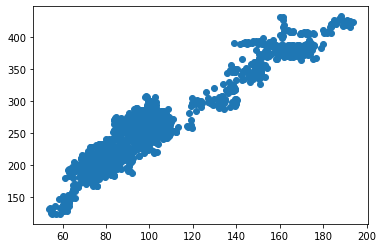

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [ ]:
# def predict(self, x):
#     return self.b0 + self.b1 * x

In [ ]:
# def error(self, X, Y):    
#     return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

In [ ]:
# def BGD(self, X, Y):  
#         alpha = 0.00005
#         dJ0 = sum(self.predict(X) - Y) /len(X)
#         dJ1 = sum((self.predict(X) - Y) * X) /len(X)
#         self.b0 -= alpha * dJ0
#         self.b1 -= alpha * dJ1

In [ ]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


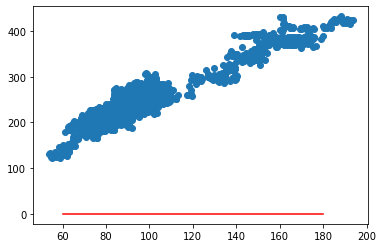

In [ ]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 6734.135540194945


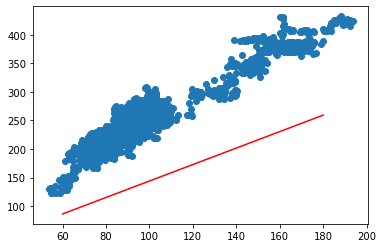

In [ ]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
            steps, errors = [], []
            step = 0        
            old_err = hyp.error(X, Y)
            new_err = hyp.error(X, Y) - 1
            dJ = 1
            while (dJ > accuracy) and (step < max_steps):
                dJ0 = sum(self.predict(X) - Y) /len(X)
                dJ1 = sum((self.predict(X) - Y) * X) /len(X)
                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1            
                old_err = new_err
                new_err = hyp.error(X, Y)
                dJ = abs(old_err - new_err) 
                step += 1            
                steps.append(step)
                errors.append(new_err)
            return steps, errors

In [ ]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


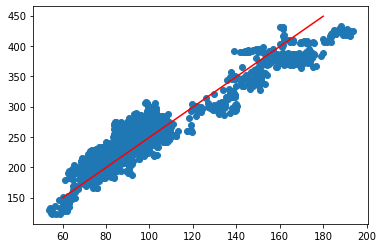

In [ ]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

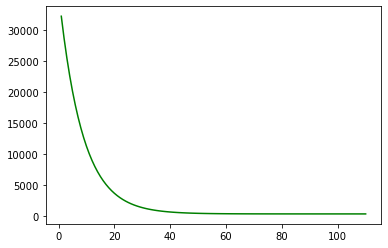

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

### С использованием Sklearn

In [ ]:
x_r = np.array(x).reshape(-1, 1)
y_r = np.array(y).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset: 70% vs 30% 
X_train, X_test, y_train, y_test = train_test_split(x_r, y_r, test_size=0.3, random_state=123)

In [ ]:
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X_train, y_train)))

The R-squared value is: 0.9067 



In [ ]:
predicted = lm.predict(X_test)
predicted

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(lm.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.9196
Mean Absolute Error: 14.728446
Root Mean Squared Error: 18.732825
Relative Absolute Error: 0.290889
Relative Squared Error: 0.080385


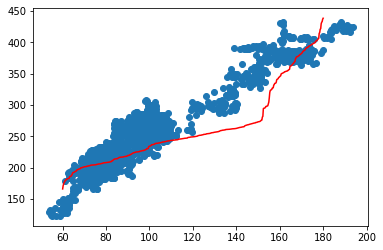

In [ ]:
import itertools

X0 = np.linspace(60, 180, 528)
merged = np.array(sorted(list(itertools.chain(*X_test)))).reshape(-1,1)
# y_0 = np.array(merged).reshape(-1,1)
Y0 = lm.predict(merged)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

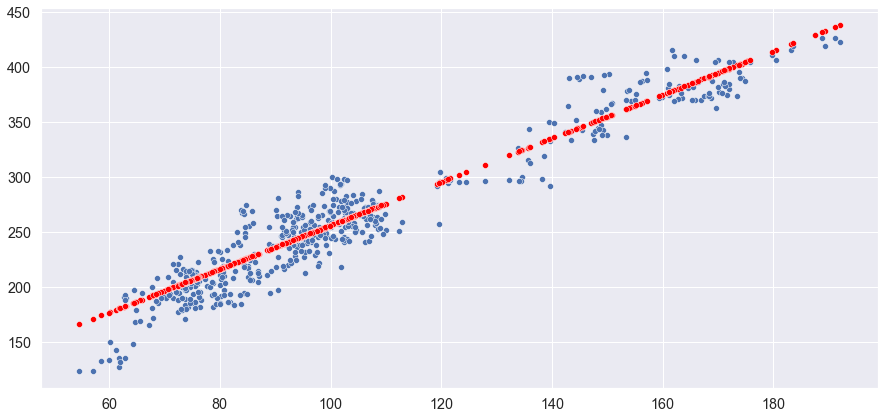

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,7))

sns.scatterplot(X_test[:,0], y_test[:,0])
sns.scatterplot(X_test[:,0], lm.predict(X_test)[:,0], color='red')